In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Load data

In [119]:
np.random.seed(5)
X = np.load("X.npy").reshape(1797, 64)
y = np.load("Y.npy")
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size = 0.2, random_state = 30)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, test_size = 0.5, random_state = 30)
N = X_train.shape[0] # sample
d = X_train.shape[1] # dimension
C = 10 #class

In [120]:
#one-hot coding
def convert_labels(y, C = C):
    return sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()

y_one_hot_train = convert_labels(y_train, C).T
y_one_hot_valid = convert_labels(y_valid, C).T

In [121]:

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def grad(X, y, W):
    A = softmax_stable(X.dot(W))
    E = A - y
    return X.T.dot(E)
def loss(X, y, W):
    A = softmax_stable(X.dot(W))
    return -np.sum(y*np.log(A))
def pred(W, X):
    A = softmax_stable(X.dot(W))
    return A

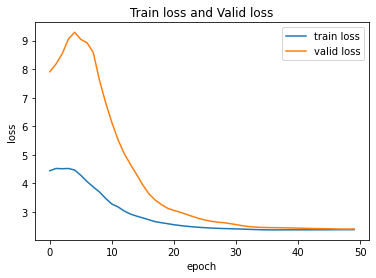

In [129]:
lr = 0.00005
epochs = 50
W = np.random.randn(d, C)
list_W = []
list_loss_train = []
list_loss_valid = []
list_accuracy_train = []
list_accuracy_valid = []
for i in range(epochs):
    W = W - lr * (grad(X_train, y_one_hot_train, W))
    list_W.append(W)
    y_pred_train = pred(W, X_train)
    y_pred_valid = pred(W, X_valid)
    
    #compute loss on training set and valid set
    list_loss_train.append(log_loss(y_one_hot_train, y_pred_train))
    list_loss_valid.append(log_loss(y_one_hot_valid, y_pred_valid))
    
    # compute accuracy on training set and valid set
    list_accuracy_train.append(accuracy_score(y_train, np.argmax(y_pred_train, axis = 1)))
    list_accuracy_valid.append(accuracy_score(y_valid, np.argmax(y_pred_valid, axis = 1)))
Min = min(list_loss)
W_opti = list_W[list_loss.index(Min)]
plt.title("Train loss and Valid loss")
plt.plot(list_loss_train, label = "train loss")
plt.plot(list_loss_valid, label = "valid loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

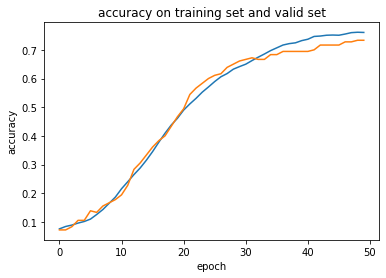

In [130]:
plt.title("accuracy on training set and valid set")
plt.plot(list_accuracy_train, label = "accuracy train")
plt.plot(list_accuracy_valid, label = "accuracy valid")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [131]:
print(max(list_accuracy_train))

0.7613082811412665


#### Test a sample

In [109]:
y_pred = pred(W_opti, X_test[0]).argmax(axis=0)

ground truth: 3
predict: 3


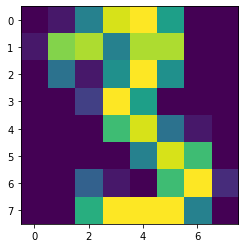

In [134]:
plt.imshow(X_test[0].reshape(8, 8))
print(f"ground truth: {y_test[0]}")
print(f"predict: {y_pred}")

#### Results by Sklearn

In [115]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [116]:
y_pred_test = clf.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred_test)

0.9555555555555556